In [1]:
# !python -m spacy download en_core_web_sm
# import spacy
# spacy.load('en_core_web_sm')

In [89]:
import spacy
import torch
import torchtext

from torchtext.legacy import datasets, data

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
# Containers for tokenisation
# using tokenize="spacy" because it's the best.
text_field = data.Field(tokenize="spacy", tokenizer_language="en_core_web_sm")
label_field = data.LabelField(dtype=torch.float) # torch.float because GPUs use floats

# Load dataset and split to train and test data
# IMDB dataset (about movies)
train, test = datasets.IMDB.splits(text_field=text_field, label_field=label_field)

In [30]:
# Split to train and validation set - 80% to train_set, 20% to validation_set
# The original set is 25k descriptions(?) so train_set after the split is 20k and valid_set is 5k.
train_set, valid_set = train.split(0.8)
len(train_set), len(valid_set)  # 20_000, 5_000
text_field.build_vocab(train_set, max_size=25_000)
label_field.build_vocab(train_set)

assert len(text_field.vocab) == 25_002

In [31]:
# Map int to string and string to int
# text_field.vocab.itos[186] -> 'though'
# text_field.vocab.stoi['though'] -> 186

(array([5.54156171e-05, 5.11335013e-04, 1.54911839e-03, 1.65239295e-03,
        1.57934509e-03, 2.62468514e-03, 5.30478589e-03, 5.40806045e-03,
        4.16372796e-03, 3.36523929e-03, 2.87153652e-03, 2.26448363e-03,
        1.88916877e-03, 1.56926952e-03, 1.53148615e-03, 1.28715365e-03,
        1.15617128e-03, 1.04282116e-03, 1.00000000e-03, 8.23677582e-04,
        7.95969773e-04, 6.52392947e-04, 5.91939547e-04, 5.59193955e-04,
        5.31486146e-04, 4.48362720e-04, 3.80352645e-04, 4.03022670e-04,
        3.65239295e-04, 3.04785894e-04, 2.67002519e-04, 2.77078086e-04,
        2.29219144e-04, 2.44332494e-04, 2.24181360e-04, 2.21662469e-04,
        1.73803526e-04, 1.81360202e-04, 1.08312343e-04, 1.38539043e-04,
        1.30982368e-04, 1.38539043e-04, 1.20906801e-04, 1.03274559e-04,
        1.15869018e-04, 6.04534005e-05, 8.31234257e-05, 9.82367758e-05,
        8.06045340e-05, 4.53400504e-05, 6.54911839e-05, 7.05289673e-05,
        5.28967254e-05, 5.54156171e-05, 5.28967254e-05, 6.801007

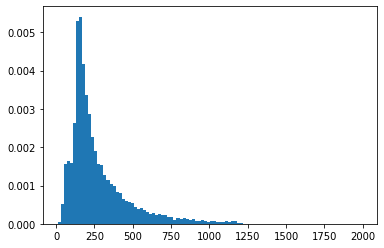

In [93]:
zz = [len(x.text) for x in train_set]

import matplotlib.pyplot as plt

plt.hist(zz, bins=100, density=1)

In [82]:
 data.BucketIterator??

In [97]:
len(max(train_set, key=lambda x: len(x.text)).text)

# but we can do better!
bb = data.BucketIterator(train_set, batch_size=64, device=device, sort_key=lambda x: len(x.text), sort=True)
bb2 = [x for x in bb]

In [100]:
data.BucketIterator??

In [80]:
# bb2[0].text.numpy.apply(text_field.vocab.itos)
import numpy

# ll = lambda x: text_field.vocab.itos[x]
# nn = numpy.vectorize(ll)
# for ii in range(64):
#     print(''.join(nn(bb2[0].text.numpy())[..., ii]))
#     print()

"Die<unk>"washighlyrecommendedtobeoneofthefewgoodactionmoviesmadeinGermany.IwatcheditlastnightandImustadmit,thatIamdeeplydisappointed.Ifthatissupposedtobe"thelastbesthope"forentertainingandchallengingGermanactioncinema,wellthenthereisnotmuch<unk>/><br<unk><unk>"triestobesexy,daringandfuriousbutitisnothingofthatkind.Thecharactersarewoodenandstereotypeandwhenevertheydosomethingunexpected(whichdoesn'thappentoomuch)theactagainsttheirnature.Thatmakesithard-formealmostimpossible-tofollowthemorevenidentifywiththem.<br/><br/>MostofallIthinkthefilmisverybadcast.ThereisnotonecharacterinwhomIbelieve.MaybethesuperiorofficerattheSWATunit-butthat'saboutit.Thosepeoplethattrytolooklikeoractlikespecialunits,likeelitecops-Idon'tbelievethem.Notfora<unk>/><br/>Thestoryisnotsobadafterall.ButIthinkit'sbadlytold.Youdon'tgettoknowthebadguyatall-forexample.Andwhenaftera"verydark"showdownKarlSimon(thegoodguy)askshisalreadydeadopponent"why?...whatfor?"Ididaskmyselfthatverysamequestion,knowing,that<unk><unk>would

Thoughnotseenintoomanyfilmsprior,youhavecertainlyseenthebasicplotthemesintoomanyfilmssince.<br/><br/>NotoneofGrant'snorLoy'sbestfilms,theymakeanoutstandingefforttogether.Afterall,withthatmuchtalentandverygoodsupportingcast,youknowthelaughswillbethere.<br/><br/>Thefilmislight,hassomedramaticspottingbutkeepstheplotmovingandgetsyoutosmilethewholewaythrough.<br/><br/>AgreatexampleofclassicAmericanfilmfarethathasstoodthetestoftime.<br/><br<unk>Saturdayafternoonfare,heavyonthepopcorn.<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><p

It'spossiblethatAManCalledSledgemighthavebeendone<unk>damageonthecuttingroomfloor.Maybesomeonewilldemandadirector'scutoneday,butIseriouslydoubtit.<br/><br/>JamesGarnerdecidedtocashinonthespaghettiwesternmarketandindoingsobroughtawholelotofAmericansovertofillthecastout.FolkslikeDennisWeaver,Claude<unk>,JohnMarley.AndofcoursewehaveVicMorrowwhobothwroteanddirectedthisfilm.<br/><br<unk>alwaysgetscastaslikable<unk>becausehe'ssodarngoodatplayingthem.ButhehasplayedseriousanddoneitwellinfilmslikeTheChildren'sHourandHouroftheGun.Hecanandhasbrokenawayfromhisusualstereotypedpartsuccessfully.ButAManCalledSledgecan'tbecountedasoneofhis<unk>/><br/>He'sgotthetitleroleasLutherSledgenotoriousoutlawwithabigpriceonhishead.AfterpartnerTonyYounggetskilledinasaloonandGarnertakesappropriateEastwoodstylemeasures,he'sfollowedfromthesaloonbyJohn<unk>/><br<unk>'sspenttimeinthenearby<unk>prisonanditseemsasthoughgold<unk>areputunderlockandkeythereonareststopforthefolkstransportingthestuffonaregularrun.Garnergetshi

"<unk>"isthekindofworthlessflickwhichjusthangsoutamongthecablechannelstakingupspacelikeacheesydimenovelinthepubliclibrary.Aworthlessbitoftripeandfirsteffortformediocredirector<unk>,thefilmisfraughtwithbadacting,badsound,badcamerawork,andpoorqualityinallaspectsofthefilm.Manybetterfilmsnevermakeittomarketandwhyjunkflickslikethisonedoandneverseemtogoawayisoneoflife'sgreatmysteries.(D-)<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>

thismoviewasn'tabsolutelyatrocious,butitwasprettybad.theactingACTUALLYwasprettygood!<unk><unk>didaprettydarngoodjobasthemadscientist,whichissortofhisspecialtyifyoudon'tknowsuchthings:D.bill<unk>..well,i'mnotEXACTLYsurewhyhewasinthisfilm.he'swaytoogoodforthiskindastuff,andhisrolewasn'texactlydemanding.Irentedthisonthestrengthofthosetwoleads,andIwasn'treallydisappointed.Imean,heck,it'samovieaboutahalfman/halfshark.Itain'tShakespearefolks.Otherthantheplot,whichisfullofholes,andthepoordialogue,Iwouldliketonotethatthecinematographyalsoleftmanythingstobedesired.therewereshotsweretheyweretryingtolook"cool",butitendedup<unk>thesceneorjustcomingoffplaincheezy.theyalsoblewitmanytimeswhentheyhaddecentdialogueandcutawayprematurelybeforethepersoncouldevendelivertheline.itwasprettybad.butifyouarea<unk><unk>fan,thisoneisworthcheckingout.hegivesagreatperformanceanddoeswhathecanwiththecharacter.<unk>ain'tbadeither,andeitheristhefemalelead.heckificanrememberhernamethough.bottomline,iwouldn'totherwisewas

"It'slikehardtolikedescribejusthowlikeexcitingitisliketomakearelationshiplikedramalikewithallthelikepornographicscenesthrownlikeinforlikegoodmeasurelike,andtostiruplike<unk>like<unk>andmakeusmorelikemoneyandlikestuff."-Ellen,thelost<unk>/><br<unk>,Like,Onthe,Like,<unk>AndStuff"islikethebestlikeartisticendeavorlikeevermade.WatchinglikeEllen'shairyarmsandlikeChrismasturbatingwasliketheheightofmyyears-longmovie-viewingexperienceandstuff.ButbeforeIlikebeginlikebreakingnew<unk>-something-airheadrecordswiththemy"likes",letmelikejustbrieflylistlikethe<unk>like<unk>ofthisvisuallikefeast:<br/><br/>1.Chrisdoingthedeedwithhisgenitals.Andnotjustthat:thewaythecamera(guidedsoelegantlybyEllenandPatrick)rewardstheviewerwithafull-screenshotofChris'sfatwhite-trashstomachafterhefinishestheun-Catholicdeed-thatwastrulythrilling.IcaninallhonestysaythatI'veneverseensuchgrace.Chris,youshoulddomoresuchscenesinyournextmovies,becausethatisexactlywhatweneededasacontinuationofwhatthatbrilliant,brilliantman,Larsvon

Ihaveheardalotaboutthisfilm,withpeoplewritingmetellingmeIshouldseeit,asIamafanofextremelybloody,gorymovies.Igotmyhandsonitalmostrightaway,butonethingoranotheralwayskeptmefromwatchingit-untilnow.IwouldhavebeenbetteroffnotrememberingIevenhadit.<br/><br/>Thismoviewasatrocious.Theworstthingthoughisthatitcouldhavebeensomuchbetterthanitactuallywas.IknowitwasastorybyCliveBarkerandall,andnoIhavenotreadthat<unk>butitappearstomethatifyouhaven'tthenyouwillbe,asIwas,completelycluelessandutterlydisappointed.<br/><br/>Thefilmbeginsgood<unk>theactorsareconvincing,thestoryinteresting.Thefirstsceneis<unk>agreatwaytocatchyourattention.Ithoughtthebloodlookedabitbad,butseeingasitwastheveryfirstsceneIdidhopeforimprovementlateron.Iwaswrong.<br/><br/>Thebloodandeffectsaresohorrible,itwasalmostaninsulttomyintelligencetobeexpectedtobelievethat,forinstance,someonecouldknockaperson'sheadrightofftheirshouldersusingonlyameathammer.WTF?CGIblood(didtheyevenuseANY"real"bloodatall?Myhomemadestufflooksbetterthananyused

In [6]:
# data.get_tokenizer??
# nlp = spacy.load("en_core_web_sm")
# gg = nlp("I am a dog in Paris! I am a cat.")
# gg.to_json()